# **Logistic Regression**

## Basic Introduction



In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$p =1 / 1 + e^{-y}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely.
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables.
* Vulnerable to overfitting.


#### Data
Is the candy chocolate?  Let's find out because... yum

(This intro was built on a candy-data.csv dataset in DataScience folder also found at

https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv )

**Descarga el Dataset candy-data.csv de la liga de arriba**

## **Bibliotecas**

In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

**Carga el Dataset descargado**

In [3]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving candy-data.csv to candy-data.csv
User uploaded file "candy-data.csv" with length 5193 bytes


## **Data Loading**

In [4]:
# Explore data

df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8')))
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']]

df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


In [5]:
df.describe()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764,0.435294
std,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357,0.498738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290,1.000000


## **Split the Data into training and testing sets**

In [6]:
# Split data into train test sets

from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.2)

## **Creating Dataframes**

In [7]:
# Creating the dataframes for training and test datasets
train_df = trainingSet
test_df = testSet

#Clean the missing values if needed
#train_df = train_df.dropna()
#test_df = test_df.dropna()

In [8]:
#Since the data is already split into Train and Test datasets, load the values into X_train, X_test, y_train, y_test
#X_train = train_df.iloc[:,:-1].values
#y_train = train_df.iloc[:,1].values
#X_test = test_df.iloc[:,:-1].values
#y_test = test_df.iloc[:,1].values

X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_train = train_df["chocolate"]

X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']]

y_test = test_df["chocolate"]



## **y_test visualization**

In [9]:
y_test.head()

57    0
15    0
13    0
7     0
53    1
Name: chocolate, dtype: int64

In [25]:
y_test.describe()

count    17.000000
mean      0.411765
std       0.507300
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: chocolate, dtype: float64

## **Data Exploration**

In [10]:
y_train.value_counts()

0    38
1    30
Name: chocolate, dtype: int64

<ipython-input-11-90d74883f25f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train_df, x="chocolate", palette='Blues_d')


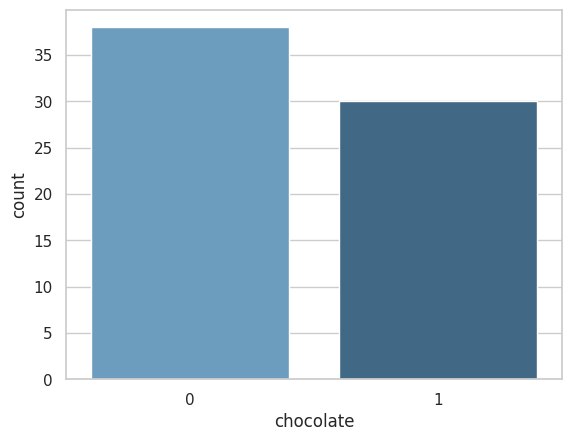

<Figure size 640x480 with 0 Axes>

In [11]:
sns.countplot(train_df, x="chocolate", palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [12]:
count_no_choc = len(train_df[train_df['chocolate']==0])
count_choc = len(train_df[train_df['chocolate']==1])
pct_of_no_choc = count_no_choc/(count_no_choc+count_choc)
print("percentage of no chocolate is", pct_of_no_choc*100)
pct_of_choc = count_choc/(count_no_choc+count_choc)
print("percentage of chocolate", pct_of_choc*100)

percentage of no chocolate is 55.88235294117647
percentage of chocolate 44.11764705882353


In [13]:
train_df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.789474,0.078947,0.026316,0.026316,0.0,0.289474,0.026316,0.657895,0.477105,0.361816,43.106983
1,0.000000,0.333333,0.333333,0.133333,0.2,0.000000,0.566667,0.333333,0.509167,0.657300,61.126614


In [14]:
train_df.groupby('caramel').mean()

,fruity,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
caramel,,,,,,,,,,,
0,0.527273,0.145455,0.018182,0.054545,0.2,0.181818,0.581818,0.453145,0.452600,49.289298,0.363636
1,0.076923,0.230769,0.307692,0.230769,0.0,0.615385,0.230769,0.652462,0.659615,58.534800,0.769231


## **Model Development and Prediction**
Import the Scikit Learn Logistic Regression module
Fit model on the train set using fit() then perform prediction on test set using prediction

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

## **Evaluate model using confusion matrix**
This is basically looking at how well your model did on predictions

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  0],
       [ 3,  4]])

## **Visualize CFM (confusion matrix) using a heatmap**

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

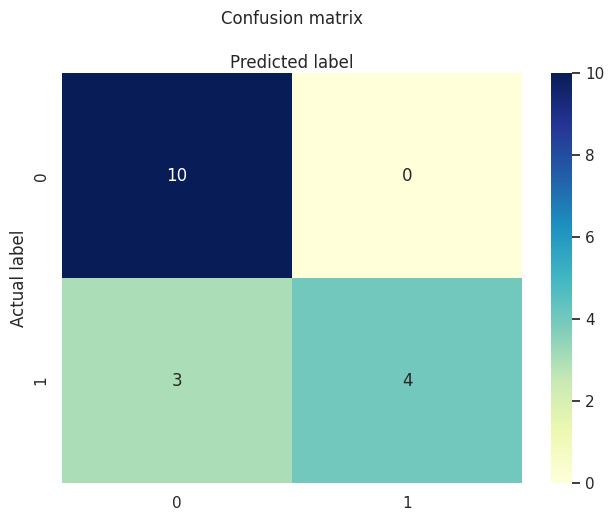

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## **CFM evaluation metrics Accuracy, Precision, Recall**

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8235294117647058
Precision: 1.0
Recall: 0.5714285714285714


### ROC (Receiver Operation Characteristic) Curve
Plotting true positive rate against false positie rate. Shows tradeoff between sensitivity and specificity.

### What is AUC - ROC Curve? (credit https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
#### AUC - ROC curve
Is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

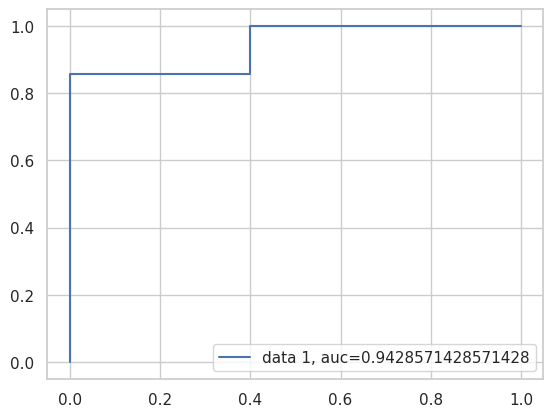

In [22]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()